# Домашнее задание "Теория вероятности. Дискретные Случайные Величины".

## Уровень 0:

- Задание 1:

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

In [1]:
from itertools import combinations

In [2]:
# Функция для расчета вероятности по формуле Бернулли. 
def bernulli(n, m, p):
    comb = len(list(combinations(range(n), m)))
    q = 1 - p
    return comb * (p ** m) * (q ** (n - m))

In [3]:
# Функция для определения простоты числа
def is_prime(n):
    if n % 2 == 0 and n != 2 or n == 1:
        return False
    else:
        for y in range(3, int(n ** .5) + 1, 2):
            if n % y == 0:
                return False
    return True

In [4]:
# Чтобы найти общую вероятность, нужно сложить результаты применения формулы для каждого из нужных чисел.
probability = 0
for m in range(16):
    if is_prime(m):
        probability += bernulli(15, m, .5)

print(f'Вероятность выпадения простого числа орлов равна {probability:.2f}.')

Вероятность выпадения простого числа орлов равна 0.35.


- Задание 2:


Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [14]:
my_random = random.sample(range(50), 10)
my_random

[2, 49, 27, 8, 31, 41, 20, 6, 25, 16]

In [33]:
my_selection = np.random.choice(my_random, 1000)

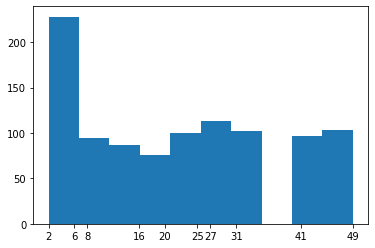

In [34]:
plt.subplot()
plt.hist(my_selection)
plt.xticks(my_random)
plt.show()

In [36]:
print(f'Среднее значение: {np.mean(my_selection)}')
print(f'Дисперсия: {np.var(my_selection)}')
print(f'Медиана: {np.median(my_selection)}')

Среднее значение: 22.309
Дисперсия: 218.783519
Медиана: 25.0


## Уровень 1:

- Задание 3:


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [51]:
# Достоверно независимыми являются результаты бросков каждой из трех монет.
# В каждом из бросков с вероятностью 0.5 может выпасть орел (1) или решка (0)
a_coin, b_coin, c_coin = np.random.choice([0, 1], 3)
(a_coin, b_coin, c_coin)

(0, 1, 1)

In [54]:
# Вероятность наступления событий А1, А2 и А3 связана прежде всего с результатом броска второй монеты.
# Первый бросок может дать любой результат, второй с вероятностью 0.5 совпадет с первым.
p_A1 = p_A2 = p_A3 = 1 * .5

# Совокупная вероятность трех событий больше единицы, что исключает их независимость
print(f'Совокупная вероятность событий А1, А2, А3: {p_A1 + p_A2 + p_A3}')

# Попарная вероятность событий при этом равна единице, т.е. они могут быть попарно независимыми.
print(f'Попарная вероятность событий А1, А2, А3: {p_A1 + p_A2}')

Совокупная вероятность событий А1, А2, А3: 1.5
Попарная вероятность событий А1, А2, А3: 1.0


In [52]:
# Пусть брошены монета 1 и монета 2, т. е. наступило событие А1 или -А1.
a_coin, b_coin = np.random.choice([0, 1], 2)
(a_coin, b_coin)

(0, 1)

In [53]:
# Тогда события А2 и А3 зависят только от броска 3-й монеты:
# если она совпадет с 1-й, наступит событие А3, если со второй - событие А2.
c_coin = np.random.choice([0, 1])
c_coin
# События попарно независимы.

1

In [55]:
# Чтобы наступили два из трех событий (пусть это будут А1 и А2), нужно бросить все три монеты
a_coin, b_coin, c_coin = np.random.choice([0, 1], 3)
(a_coin, b_coin, c_coin)

(1, 1, 0)

Этими бросками мы предопределяем наступление события А3: результаты бросков монет 1 и 3 уже известны, ничего изменить нельзя.
Таким образом событие А3 является зависимым от событий А1 и А2, и любое из трех событий зависит от пары оставшихся.
События не являются зависимыми в совокупности.

- Задание 4 (формула полной вероятности):


В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [63]:
# Для решения задачи необходимо перемножить вероятность выбора продукции определенной компании
# с вероятностью получить продукцию высшего качества при выборе этой компании. Полученные результаты нужно сложить.
p_companies = [.2, .3, .5]
p_top_grade = [.1, .05, .2]

p_high = sum(map(lambda x: x[0] * x[1], zip(p_companies, p_top_grade)))

print(f'Вероятность купить продукцию высшего качества составляет {p_high}')

Вероятность купить продукцию высшего качества составляет 0.135
